# Developers
- Namous Nassim
- Souita Ikram
- Benfaddoul Fahd

# Dataset
[Brain Tumor MRI Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os

In [2]:
train = '../data/Training'
test = '../data/Testing'

In [3]:
categories = ['glioma','meningioma','notumor','pituitary']
counts = {}

for category in categories:
    cat_path = os.path.join(train, category)
    if os.path.exists(cat_path):
        img_num = len(os.listdir(cat_path))
        counts[category] = img_num
    else:
        print(f'Chemin {cat_path} n\'existe pas')
    
print("Nombre d'images par catégorie : ", counts)
for category , n in counts.items():
    print(f'{category} : {n} images')
    
   

Nombre d'images par catégorie :  {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
glioma : 1321 images
meningioma : 1339 images
notumor : 1595 images
pituitary : 1457 images


In [4]:
## Visualising Number of Images in Each Category

fig = go.Figure()

# Add bar chart with labels
fig.add_trace(go.Bar(
    x=list(counts.keys()),
    y=list(counts.values()),
    marker_color=['blue', 'green', 'red', 'purple'],
    text=list(counts.values()),  # Add labels
    textposition='auto'  # Display labels on top of the bars
))

# Customize layout
fig.update_layout(
    title="Image Distribution by Category",
    xaxis_title="Category",
    yaxis_title="Number of Images",
    xaxis_tickangle=20,
    font=dict(size=12),
    yaxis=dict(gridcolor='rgba(127,127,127,0.3)')  # Add gridlines
) 


In [5]:
import os
from tqdm import tqdm
from PIL import Image



image_sizes = []

# Function to collect image sizes from a directory with a progress bar
def collect_image_sizes(directory):
    # Loop through files with a progress bar
    for root, dirs, files in tqdm(os.walk(directory), desc=f"Processing {directory}"):
        for file in files:
            if file.endswith('.jpg'):
                image_path = os.path.join(root, file)
                img = Image.open(image_path)
                # Append the (width, height) to the list
                image_sizes.append(img.size)

# Collect image sizes from both the training and testing directories
collect_image_sizes(train)
collect_image_sizes(test)

# Convert image sizes to a NumPy array for easy manipulation
resolutions = np.array(image_sizes)

# Create a scatter plot figure with Plotly
fig = px.scatter(
    x=resolutions[:, 0],
    y=resolutions[:, 1],
    title="Distribution of Image Resolutions",
    labels={"x": "Width (pixels)", "y": "Height (pixels)"},
    hover_name=[f"{w}x{h}" for w, h in resolutions]
)

# Customize the plot
fig.update_layout(
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

Processing ../data/Training: 5it [00:56, 11.32s/it]
Processing ../data/Testing: 5it [00:11,  2.37s/it]


# Conclusion
Le jeu de données souffre d'un déséquilibre des classes, la classe "no_tumor" étant sous-représentée.
Les images du jeu de données varient en taille, nécessitant une standardisation.

# Solutions
- **Augmentation de Données**: Appliquer des techniques telles que la rotation, le retournement et le zoom pour augmenter la représentation des catégories sous-représentées.
- **Redimensionnement des Images**: Normaliser toutes les images à une taille cohérente pour un traitement uniforme.

In [9]:
import cv2 
from tqdm import tqdm
import os

img_size = 224 # 224x224 pixels
def resize_save(input_dir,output_dir,img_size,catgeroies):
    os.makedirs(output_dir,exist_ok=True)

    for category in categories:
        category_dir = os.path.join(output_dir,category)
        os.makedirs(category_dir,exist_ok=True)
        folderPath = f'{input_dir}/{category}'

        for file in tqdm(os.listdir(folderPath) , desc=f"Process {category}"):
            img_path = f'{folderPath}/{file}'
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img,(img_size,img_size))
                cv2.imwrite(f'{category_dir}/{file}', img)
    print(f"Images resized and saved in {output_dir}")

train_data_rezsized = 'resized_data/Training'
test_data_resized = 'resized_data/Testing'

resize_save(train,train_data_rezsized,img_size,categories)


Process glioma:   0%|          | 0/1321 [00:00<?, ?it/s]

Process pituitary: 100%|██████████| 1457/1457 [00:07<00:00, 204.50it/s]

Images resized and saved in resized_data/Training


In [10]:
resize_save(test,test_data_resized,img_size,categories)

Process pituitary: 100%|██████████| 300/300 [00:01<00:00, 236.96it/s]

Images resized and saved in resized_data/Testing


In [11]:
image_sizes = []

collect_image_sizes(train_data_rezsized)
collect_image_sizes(test_data_resized)
resolutions = np.array(image_sizes)

fig = px.scatter(
x=resolutions[:, 0],
y=resolutions[:, 1],
title="Distribution of Image Resolutions",
labels={"x": "Width (pixels)", "y": "Height (pixels)"},
hover_name=[f"{w}x{h}" for w, h in resolutions]
)

fig.update_layout(
showlegend=False,
hovermode="closest",
width=800,
height=600,
margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

Processing resized_data/Training: 5it [00:43,  8.70s/it]
Processing resized_data/Testing: 5it [00:11,  2.28s/it]


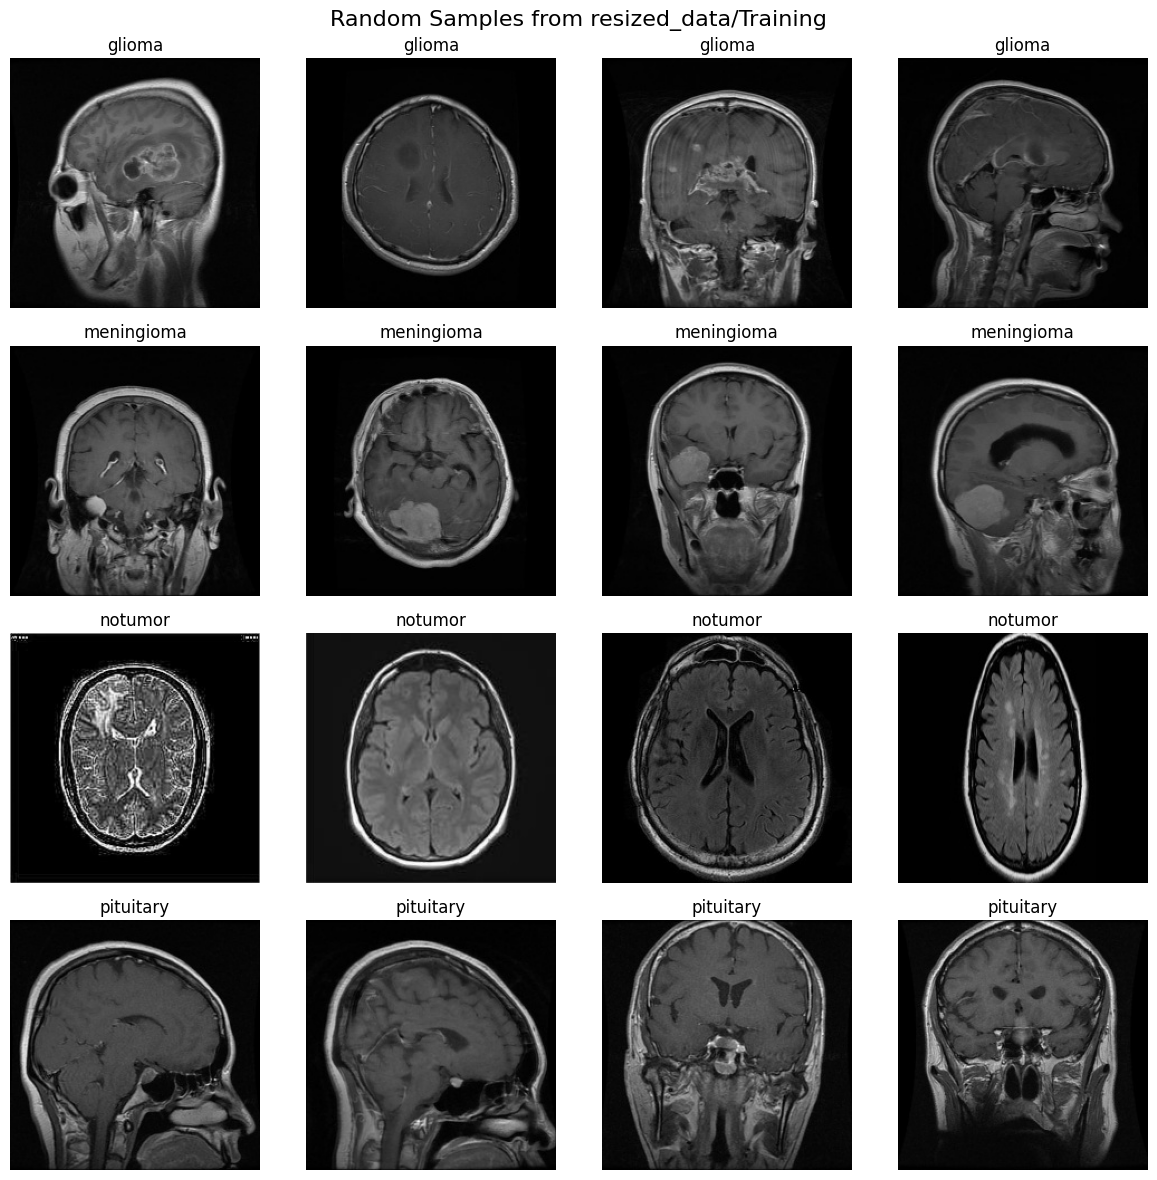

In [13]:
import random 

def display(resized_folder,categories,img_size=224,samples=4):
    fig , axes = plt.subplots(len(categories),samples,figsize=(samples*3,len(categories)*3))
    fig.suptitle(f"Random Samples from {resized_folder}",fontsize=16)
    for i , category in enumerate(categories):
        category_path = 'resized_data/Training/'+category
        images = os.listdir(category_path)
        samples_images = random.sample(images,samples)
        for j , image in enumerate(samples_images):
            img_path = os.path.join(category_path,image)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            axes[i,j].imshow(img)
            axes[i,j].set_title(f'{category}')
            axes[i,j].axis('off')
    plt.tight_layout()
    plt.show()

resized_folder = 'resized_data/Training'
display(resized_folder,categories) 

In [14]:


# Function to remove background from greyscale images
def remove_background(input_directory, output_directory):
    os.makedirs(output_directory, exist_ok=True)  # Create output directory if it doesn't exist

    # Loop through each label in the dataset
    for label in os.listdir(input_directory):
        label_dir = f'{input_directory}/{label}'
        output_label_dir = f'{output_directory}/{label}'
        os.makedirs(output_label_dir, exist_ok=True)  # Create subdirectory for processed images

        for filename in tqdm(os.listdir(label_dir), desc=f"Removing background for {label}"):
            if filename.endswith('.jpg'):
                img_path = f'{label_dir}/{filename}'
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as greyscale

               
                _, mask = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

         
                contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours:
                    
                    largest_contour = max(contours, key=cv2.contourArea)

                    x, y, w, h = cv2.boundingRect(largest_contour)

                    cropped_img = img[y:y+h, x:x+w]

                    
                    output_path = f'{output_label_dir}/{filename}'
                    cropped_img = cv2.resize(cropped_img, (img_size, img_size))
                    cv2.imwrite(output_path, cropped_img)


train_data_background_removed = 'background_removed_dataset/Training'
test_data_background_removed = 'background_removed_dataset/Testing'

remove_background(train_data_rezsized, train_data_background_removed)
remove_background(test_data_resized, test_data_background_removed)

Removing background for pituitary: 100%|██████████| 300/300 [00:00<00:00, 329.58it/s]
